# Predicting Smokers and Drinkers Using Body Signal Data

By: Mani Teja Gunda

ID: RQ47971

Data Source: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import pickle
import streamlit as st

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,f1_score,classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [2]:
df = pd.read_csv("source_data.csv")

### About the dataframe

In [3]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 991346 rows and 24 columns


In [4]:
# the first 10 rows
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [5]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [6]:
# all the columns
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [7]:
# datatypes
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

As the smoking state column is a flag indicating the smoking status of a person, converting it from float to object

### Data Cleaning

In [8]:
# checking for duplicate rows
print("number of duplicated rows:", df.duplicated().sum())

number of duplicated rows: 26


In [9]:
# checking for null values
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

There are no null values in any of the columns. So, we are going to drop the duplicate rows

In [10]:
# dropping the duplicate rows
print("Number of rows before dropping duplicates are", len(df.index))
df = df.drop_duplicates()
print("Number of rows after dropping duplicates are", len(df.index))

Number of rows before dropping duplicates are 991346
Number of rows after dropping duplicates are 991320


In [11]:
# transforming the sex and DRK_NY columns
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["DRK_YN"] = df["DRK_YN"].map({"Y": 1, "N": 0})

df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].astype(int)

## Exploratory Data Analysis

In [12]:
# 1(never smoked)
# 2(used to smoke but quit)
# 3(still smoking)

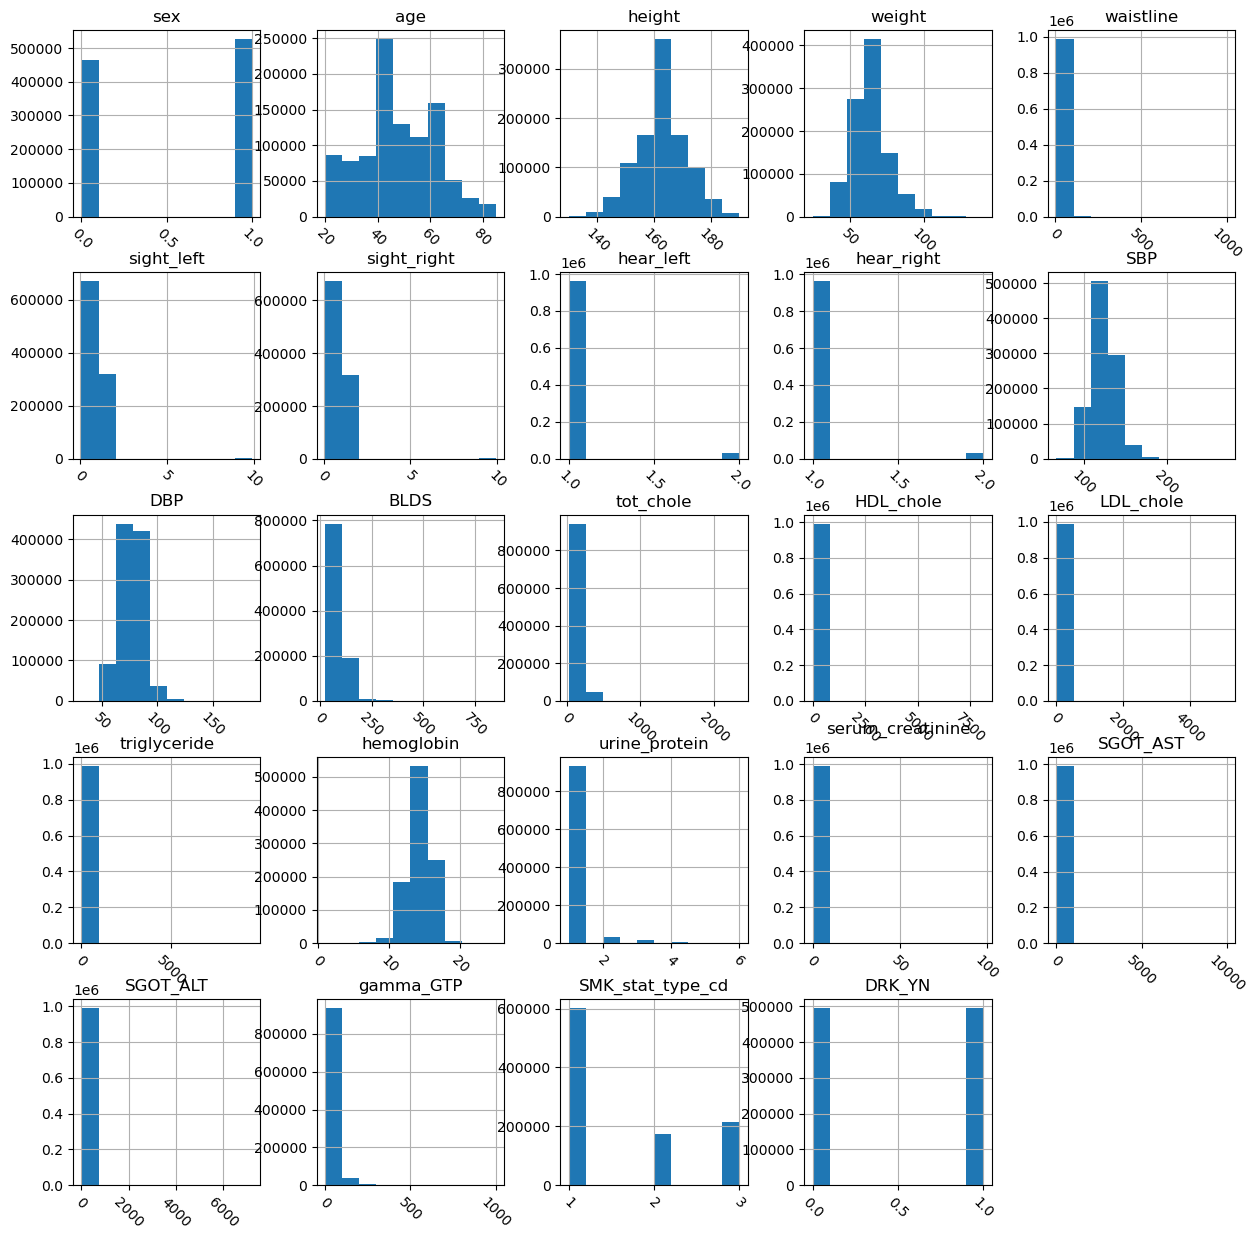

In [13]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

Smoking states are as follows: 1(never smoked), 2(used to smoke but quit), 3(still smoking).

Text(0.5, 1.0, 'Drinking State')

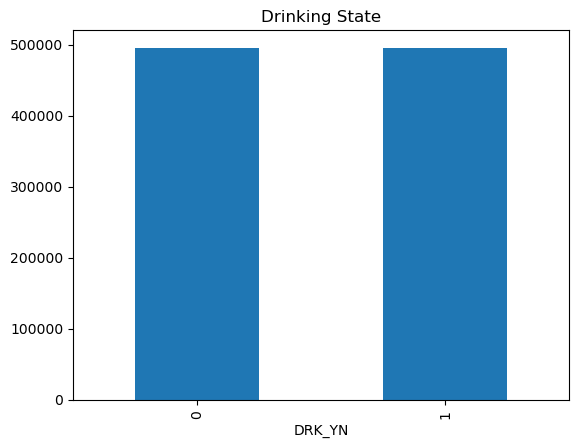

In [14]:
df['DRK_YN'].value_counts().plot(kind="bar")
plt.title("Drinking State")

Text(0.5, 1.0, 'Smoking State')

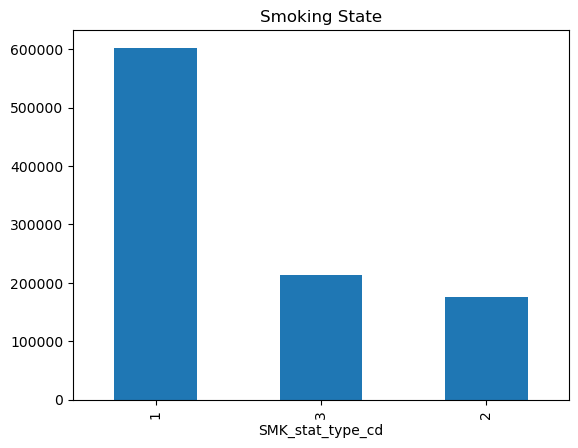

In [15]:
df['SMK_stat_type_cd'].value_counts().plot(kind="bar")
plt.title("Smoking State")

The data does not require merging, splitting or melting. The data augmentation is not required as there is already enough data for both the labels. After the model training if it the validation accuracy is not good, augmentation will be considered

#### Do all drinkers smoke or Do all smokers drink?

Text(0.5, 0, 'Drinking State')

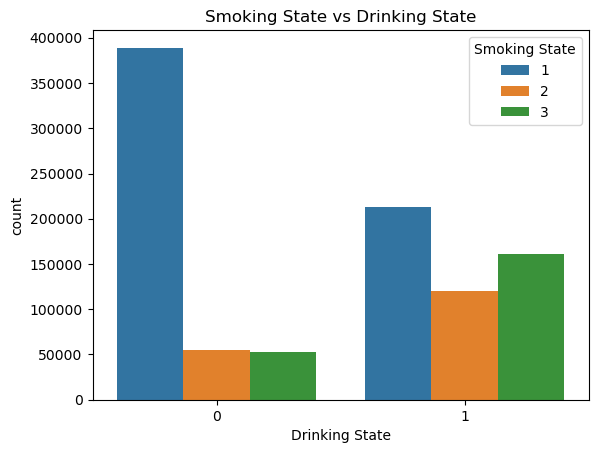

In [16]:
sns.countplot(x="DRK_YN", hue="SMK_stat_type_cd", data=df)
plt.title("Smoking State vs Drinking State")
plt.legend(title = "Smoking State")
plt.xlabel("Drinking State")

From the above plot, we can see that:
1. Majority of the non-drinkers are non-smokers
2. While majority of drinkers are non smokers, the gap between each of the smoking state is less
3. The number of drinkers who smoke are approximately three times the number of non-drinkers who smoke

#### Is it true that the majority of drinkers/smokers are men? What percent of smokers or drinkers are women?

Text(0.5, 0, 'Drinking State')

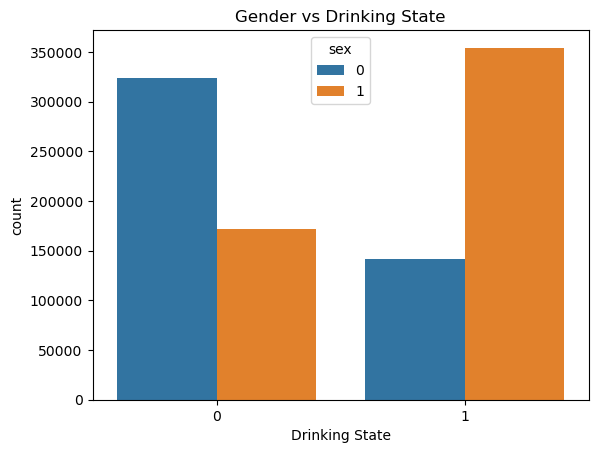

In [17]:
sns.countplot(x="DRK_YN", hue="sex", data=df)
plt.title("Gender vs Drinking State")
plt.xlabel("Drinking State")

From the above plot, we can see that:
1. Approximately 70% of the drinkers are male
2. Non-drinking female is almost twice the number of non-drinking male 

Text(0.5, 0, 'Smoking State')

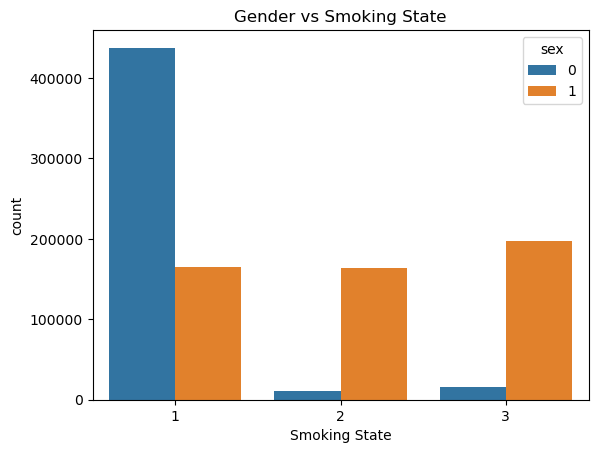

In [18]:
sns.countplot(x="SMK_stat_type_cd", hue="sex", data=df)
plt.title("Gender vs Smoking State")
plt.xlabel("Smoking State")

From the above plot, we can see that:

1. Majority of the non-smokers are female
2. Male population dominates in both the states of still smoking and quit smoking

#### What age groups do the majority of smokers/drinkers belong to?

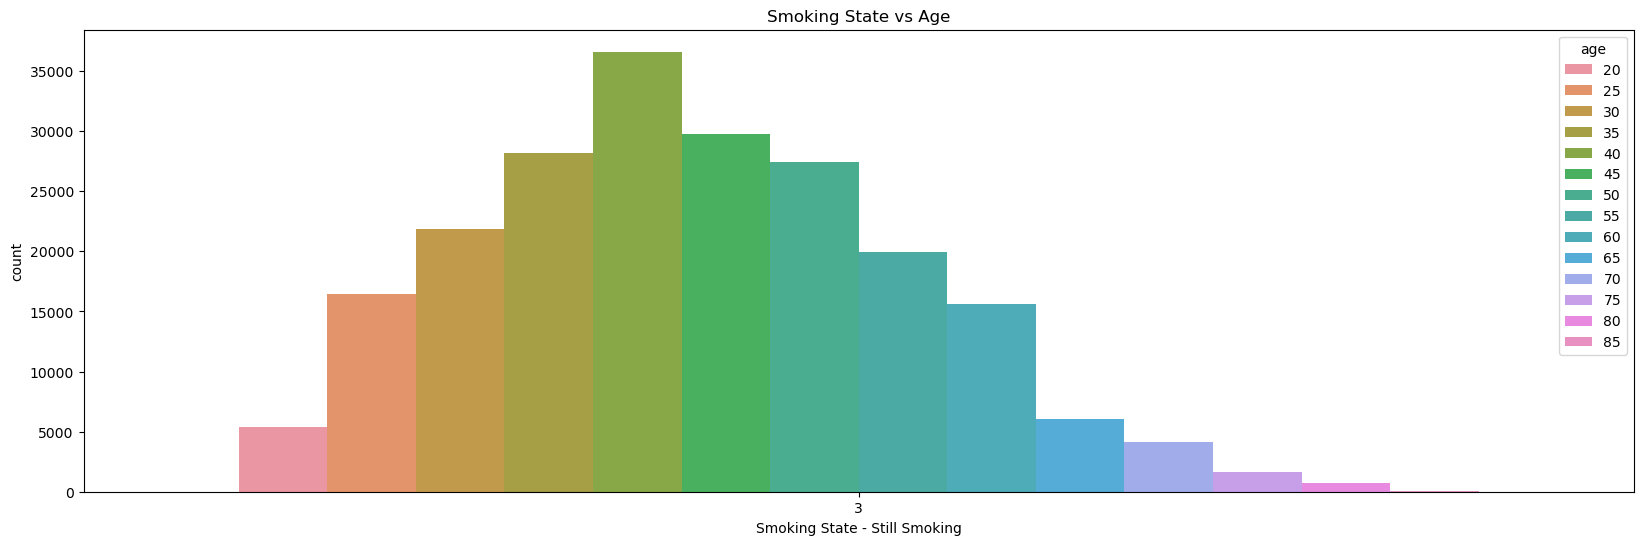

In [19]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df[df["SMK_stat_type_cd"]==3]['SMK_stat_type_cd'], hue="age", data=df)
plt.title("Smoking State vs Age")
plt.xlabel("Smoking State - Still Smoking")
plt.show()

Most of the smokers are between 35 and 50 years

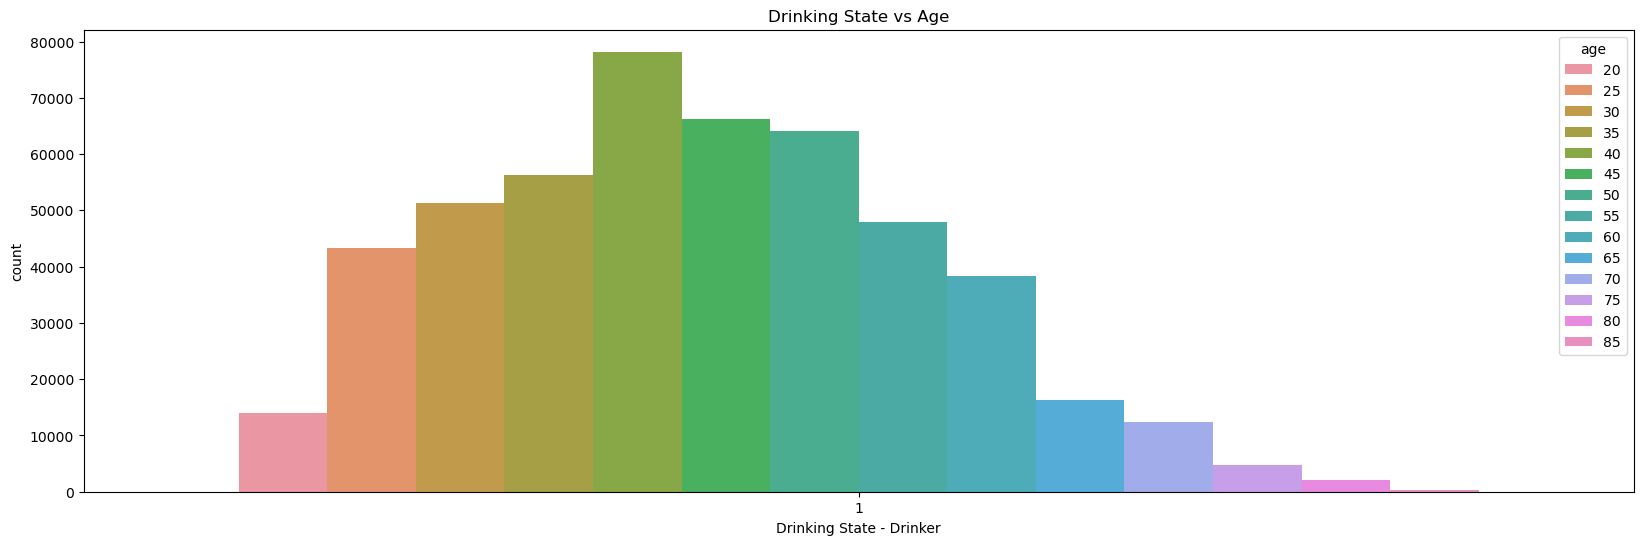

In [20]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df[df["DRK_YN"]==1]['DRK_YN'], hue="age", data=df)
plt.title("Drinking State vs Age")
plt.xlabel("Drinking State - Drinker")
plt.show()

Most of the drinkers are between 30 and 50 years

#### What are some key health indicators (features) that correlate with smoking and/or drinking habits?

#### Correlation Matrix

<Axes: >

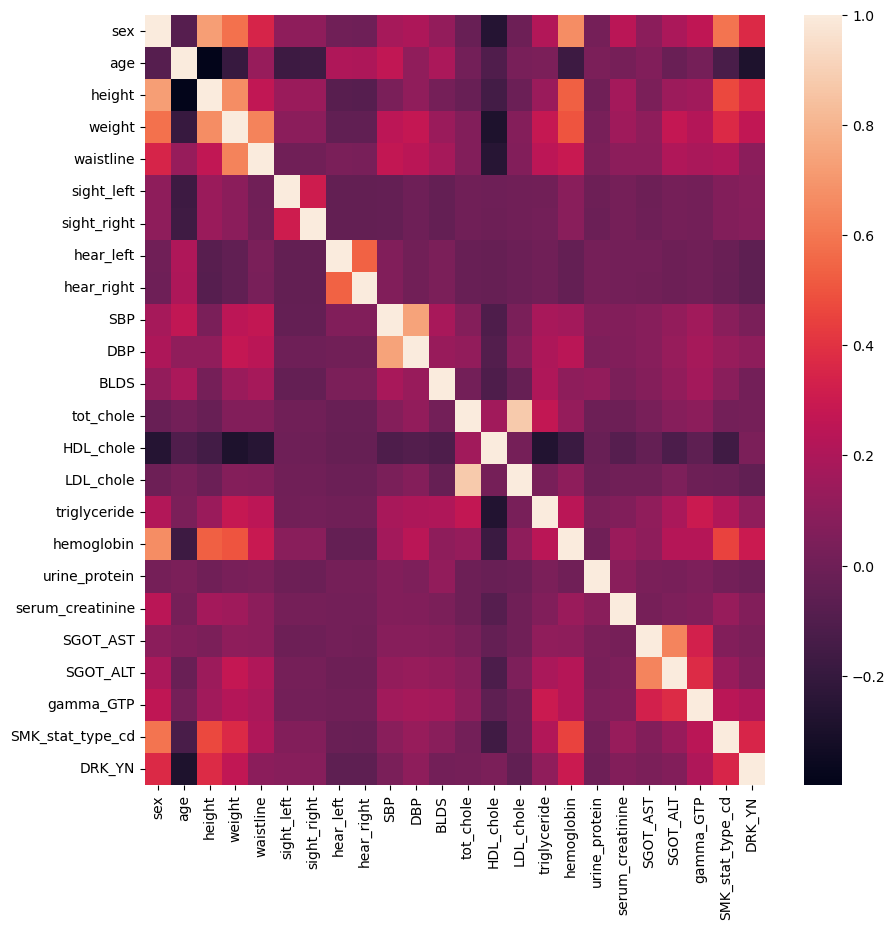

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

##### Feature selection for drinking

In [22]:
# we are selecting features for drinking using Recursive Feature Elemination method 

rfe_drk = RFE(LogisticRegression() )
rfe_drk = rfe_drk.fit(df.drop(['DRK_YN','SMK_stat_type_cd'],axis=1), df['DRK_YN'])

In [23]:
print(rfe_drk.support_)
print(rfe_drk.ranking_)
drk_features = rfe_drk.support_

[ True  True False False False False  True  True  True False  True False
 False  True False False  True False  True False  True  True]
[ 1  1  9  2  4 12  1  1  1  5  1 11  8  1  6 10  1  3  1  7  1  1]


##### Feature selection for smoking

In [24]:
#similarly for smoking
rfe_smk = RFE(LogisticRegression())
rfe_smk = rfe_smk.fit(df.drop(['DRK_YN','SMK_stat_type_cd'],axis=1), df['SMK_stat_type_cd'])

smk_features = rfe_smk.support_
print(rfe_smk.support_)
print(rfe_smk.ranking_)

[ True  True  True  True  True False False  True  True  True False False
 False  True False False  True False  True False False False]
[ 1  1  1  1  1 10  5  1  1  1  7  9  3  1  2 12  1  4  1  8 11  6]


In [25]:
smk_feature_set = set(df.columns[list(smk_features)+[False, False]]) #appending with falses to remove the labels from columns
drk_feature_set = set(df.columns[list(drk_features)+[False, False]])

In [26]:
print("Features for Drinking:")
print(drk_feature_set)
print("Features for Smoking:")
print(smk_feature_set)

Features for Drinking:
{'hemoglobin', 'DBP', 'HDL_chole', 'sight_right', 'age', 'hear_right', 'serum_creatinine', 'gamma_GTP', 'SGOT_ALT', 'sex', 'hear_left'}
Features for Smoking:
{'SBP', 'hemoglobin', 'HDL_chole', 'height', 'age', 'hear_right', 'waistline', 'serum_creatinine', 'sex', 'weight', 'hear_left'}


In [27]:
#Common features
total_features = set.union(smk_feature_set,drk_feature_set)
total_features

{'DBP',
 'HDL_chole',
 'SBP',
 'SGOT_ALT',
 'age',
 'gamma_GTP',
 'hear_left',
 'hear_right',
 'height',
 'hemoglobin',
 'serum_creatinine',
 'sex',
 'sight_right',
 'waistline',
 'weight'}

These are the selected 16 features out of all the available data that can be used for predicting smoking and drinking

In [28]:
df.to_csv("processed_data.csv", index=False)

## Modelling for Drinking

In [29]:
#Helper Functions
def plot_confusion_matrix(y_true, y_pred, class_names, class_model):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(class_model+" Confusion Matrix")
    plt.show()

In [30]:
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Model: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [31]:
df_drk = df.copy()

In [33]:
X, y = df_drk.drop(columns=['height', 'weight', 'waistline', 'SBP', 'BLDS', 'tot_chole', 'LDL_chole',
                                  'triglyceride','urine_protein', 'SGOT_AST', 'SMK_stat_type_cd', 'DRK_YN']
                         , axis = 1), df_drk.DRK_YN

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.70)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(693924, 12) (297396, 12) (693924,) (297396,)


In [34]:
report_drk={"KNN":{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}

### KNN

In [35]:
# Scaling

scaler = StandardScaler()

X_train_knn = scaler.fit_transform(X_train)

X_test_knn = scaler.transform(X_test)

In [36]:
#Saving Mean and Std for Inference
mean_drk = scaler.mean_
std_drk = scaler.scale_

In [111]:
joblib.dump(mean_drk, 'mean_drk.pkl')
joblib.dump(std_drk, 'std_drk.pkl')

['std_drk.pkl']

In [37]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred_knn = knn.predict(X_test_knn)
y_pred_knn

array([1, 1, 1, ..., 1, 0, 0])

In [39]:
auc_roc = roc_auc_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

In [40]:
#Storing Report for Tracking
report_drk['KNN']['Accuracy']=accuracy
report_drk['KNN']['Precision']=precision
report_drk['KNN']['Recall']=recall
report_drk['KNN']['F1_Score']=f1
report_drk['KNN']['ROC']=auc_roc

In [41]:
print(f"ROC AUC: {np.round(auc_roc*100,2)}")
print(f"Accuracy: {np.round(accuracy*100,2)}")
print(f"Precision: {np.round(precision*100,2)}")
print(f"Recall: {np.round(recall*100,2)}")
print(f"F1 Score: {np.round(f1*100,2)}")

ROC AUC: 66.91
Accuracy: 66.91
Precision: 66.66
Recall: 67.57
F1 Score: 67.11


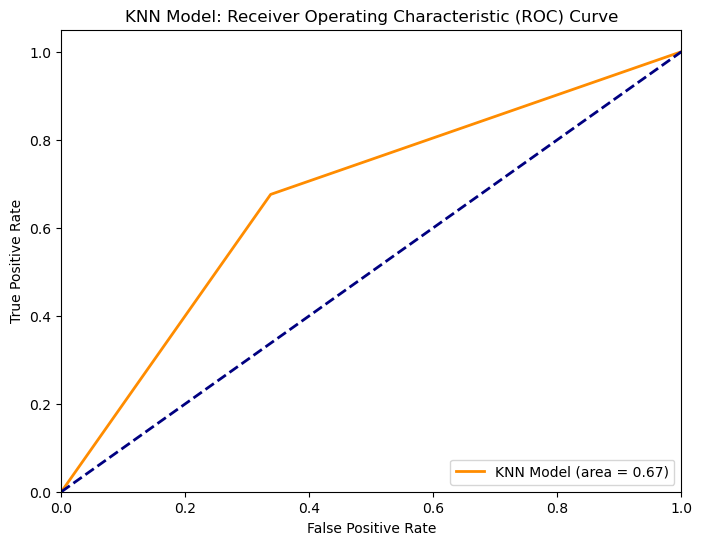

In [42]:
plot_roc_curve(y_test, y_pred_knn, "KNN")

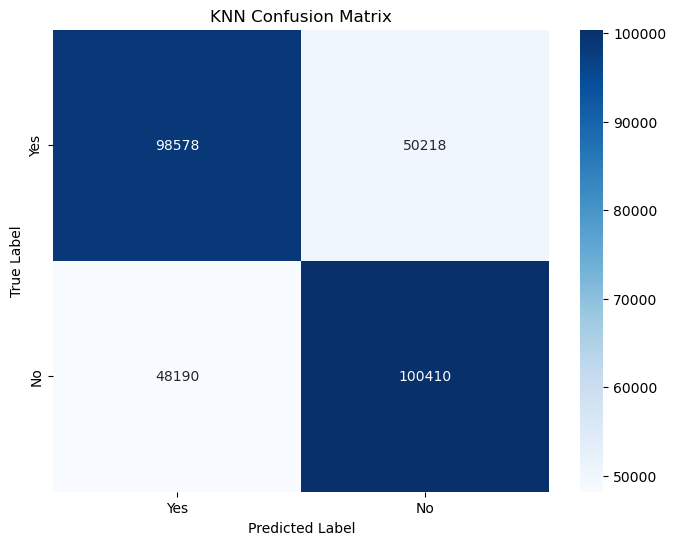

In [43]:
plot_confusion_matrix(y_test, y_pred_knn, ["Yes", "No"],"KNN")

### Logistic Regression

In [44]:
scaler = StandardScaler()

X_train_lr = scaler.fit_transform(X_train)

X_test_lr = scaler.transform(X_test)

In [45]:
lr=LogisticRegression(max_iter=100, C=0.01, n_jobs=-1)

In [46]:
lr.fit(X_train_lr,y_train)

LogisticRegression(C=0.01, n_jobs=-1)

In [47]:
y_pred_lr=lr.predict(X_test_lr)

In [48]:
auc_roc = roc_auc_score(y_test, y_pred_lr)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

In [49]:
t={'LR':{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}
report_drk.update(t)

In [50]:
#Storing Report for Tracking
report_drk['LR']['Accuracy']=accuracy
report_drk['LR']['Precision']=precision
report_drk['LR']['Recall']=recall
report_drk['LR']['F1_Score']=f1
report_drk['LR']['ROC']=auc_roc

In [51]:
print(f"ROC AUC: {np.round(auc_roc*100,2)}")
print(f"Accuracy: {np.round(accuracy*100,2)}")
print(f"Precision: {np.round(precision*100,2)}")
print(f"Recall: {np.round(recall*100,2)}")
print(f"F1 Score: {np.round(f1*100,2)}")

ROC AUC: 71.94
Accuracy: 71.94
Precision: 71.81
Recall: 72.18
F1 Score: 71.99


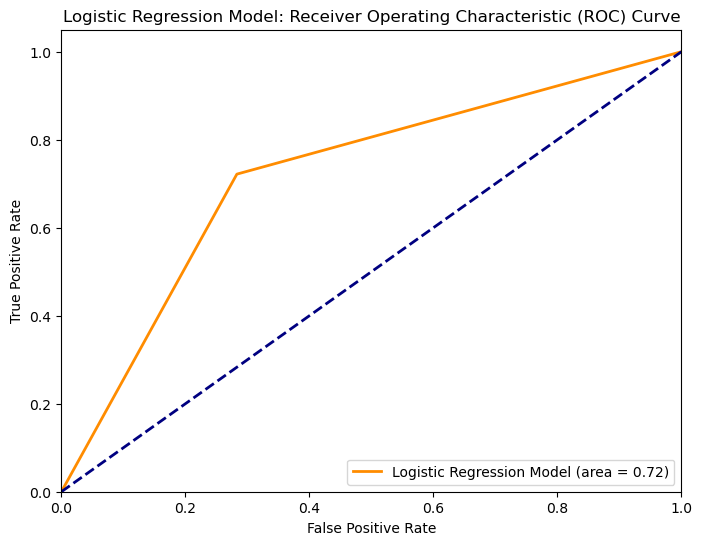

In [52]:
plot_roc_curve(y_test, y_pred_lr, "Logistic Regression")

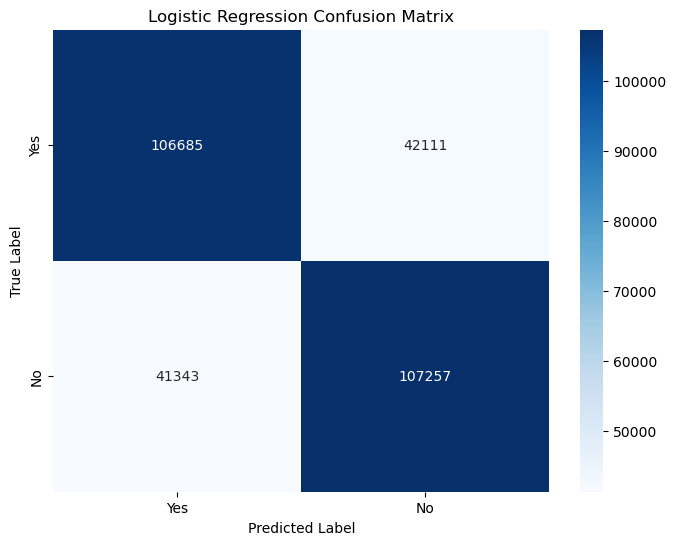

In [53]:
plot_confusion_matrix(y_test, y_pred_lr, ["Yes", "No"],"Logistic Regression")

### Decision Tree

In [54]:
scaler = StandardScaler()

X_train_dt = scaler.fit_transform(X_train)

X_test_dt = scaler.transform(X_test)

In [55]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [56]:
dt.fit(X_train_dt,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred_dt=dt.predict(X_test_dt)

In [58]:
auc_roc = roc_auc_score(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

In [59]:
t={'DT':{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}
report_drk.update(t)
#Storing Report for Tracking
report_drk['DT']['Accuracy']=accuracy
report_drk['DT']['Precision']=precision
report_drk['DT']['Recall']=recall
report_drk['DT']['F1_Score']=f1
report_drk['DT']['ROC']=auc_roc


In [60]:
print(f"ROC AUC: {np.round(auc_roc*100,2)}")
print(f"Accuracy: {np.round(accuracy*100,2)}")
print(f"Precision: {np.round(precision*100,2)}")
print(f"Recall: {np.round(recall*100,2)}")
print(f"F1 Score: {np.round(f1*100,2)}")

ROC AUC: 63.56
Accuracy: 63.56
Precision: 63.53
Recall: 63.54
F1 Score: 63.53


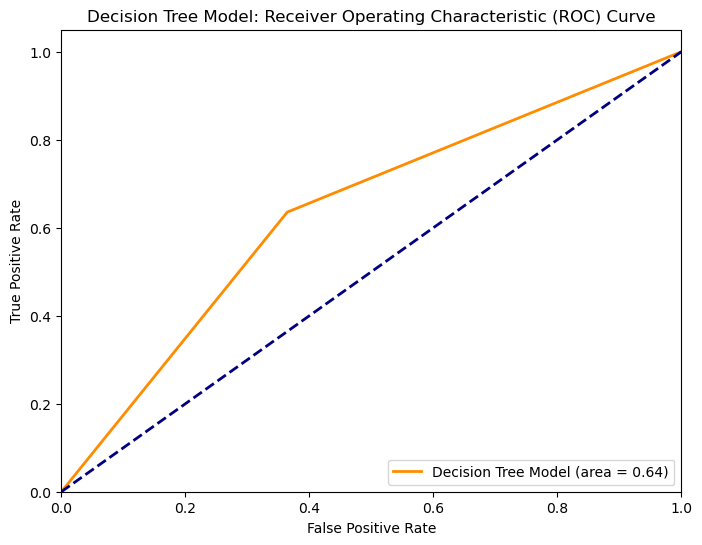

In [61]:
plot_roc_curve(y_test, y_pred_dt, "Decision Tree")

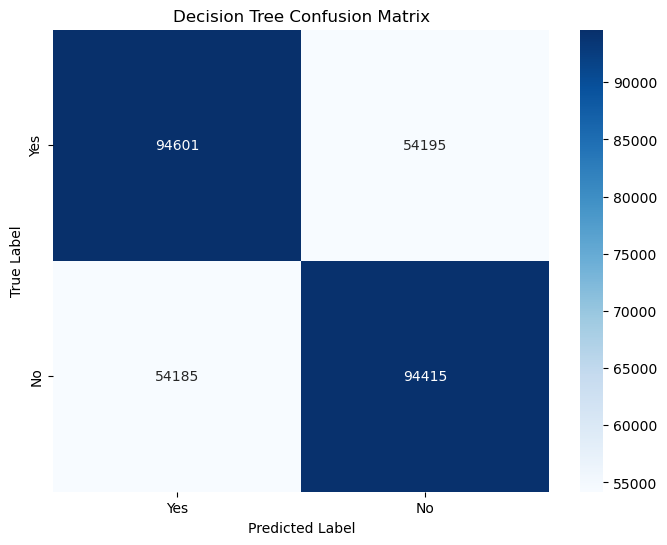

In [62]:
plot_confusion_matrix(y_test, y_pred_dt, ["Yes", "No"],"Decision Tree")

### Random Forest Classifier

In [63]:
scaler = StandardScaler()

X_train_rf = scaler.fit_transform(X_train)

X_test_rf = scaler.transform(X_test)

In [64]:
rf=RandomForestClassifier(random_state=0,n_jobs=-1)

In [65]:
rf.fit(X_train_rf,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [66]:
y_pred_rf=rf.predict(X_test_rf)

In [67]:
auc_roc = roc_auc_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

In [68]:
t={'RF':{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}
report_drk.update(t)
#Storing Report for Tracking
report_drk['RF']['Accuracy']=accuracy
report_drk['RF']['Precision']=precision
report_drk['RF']['Recall']=recall
report_drk['RF']['F1_Score']=f1
report_drk['RF']['ROC']=auc_roc

print(f"ROC AUC: {np.round(auc_roc*100,2)}")
print(f"Accuracy: {np.round(accuracy*100,2)}")
print(f"Precision: {np.round(precision*100,2)}")
print(f"Recall: {np.round(recall*100,2)}")
print(f"F1 Score: {np.round(f1*100,2)}")

ROC AUC: 72.07
Accuracy: 72.07
Precision: 71.67
Recall: 72.94
F1 Score: 72.3


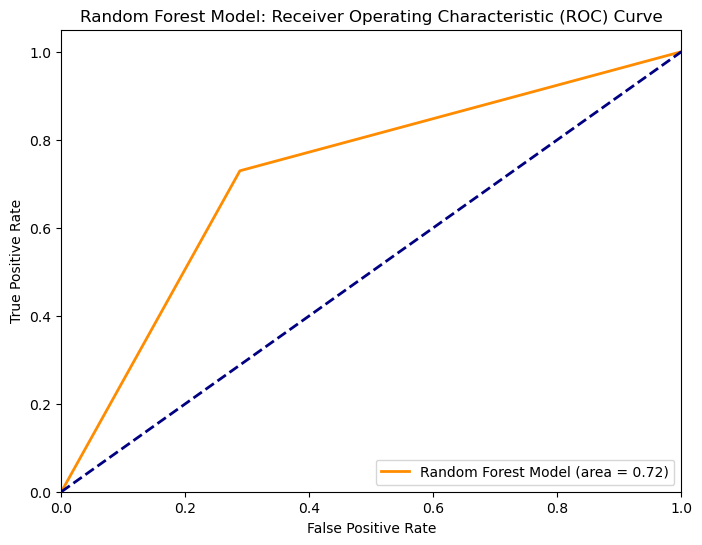

In [69]:
plot_roc_curve(y_test, y_pred_rf, "Random Forest")

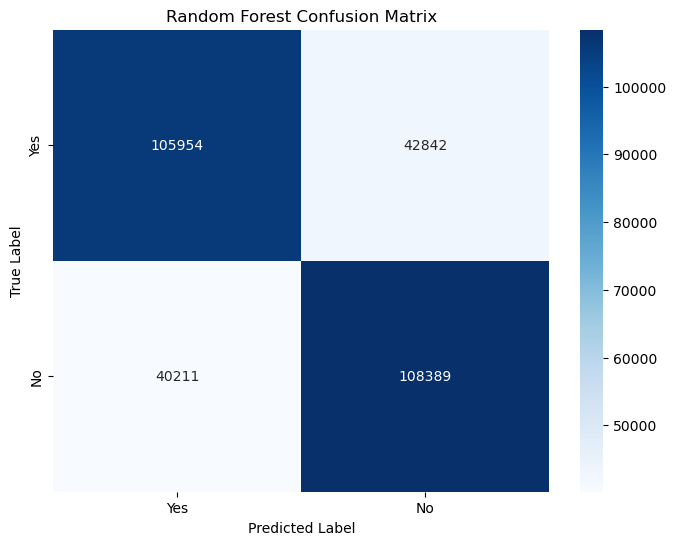

In [70]:
plot_confusion_matrix(y_test, y_pred_rf, ["Yes", "No"],"Random Forest")

### Gradient Boosting

In [71]:
scaler = StandardScaler()

X_train_gb = scaler.fit_transform(X_train)
X_test_gb = scaler.transform(X_test)

In [72]:
gb=GradientBoostingClassifier(n_estimators=10)
gb.fit(X_train_gb,y_train)
y_pred_gb=gb.predict(X_test_gb)

In [73]:
auc_roc = roc_auc_score(y_test, y_pred_gb)
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

In [74]:
t={'GB':{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}
report_drk.update(t)
#Storing Report for Tracking
report_drk['GB']['Accuracy']=accuracy
report_drk['GB']['Precision']=precision
report_drk['GB']['Recall']=recall
report_drk['GB']['F1_Score']=f1
report_drk['GB']['ROC']=auc_roc

print(f"ROC AUC: {np.round(auc_roc*100,2)}")
print(f"Accuracy: {np.round(accuracy*100,2)}")
print(f"Precision: {np.round(precision*100,2)}")
print(f"Recall: {np.round(recall*100,2)}")
print(f"F1 Score: {np.round(f1*100,2)}")

ROC AUC: 71.21
Accuracy: 71.21
Precision: 69.62
Recall: 75.2
F1 Score: 72.3


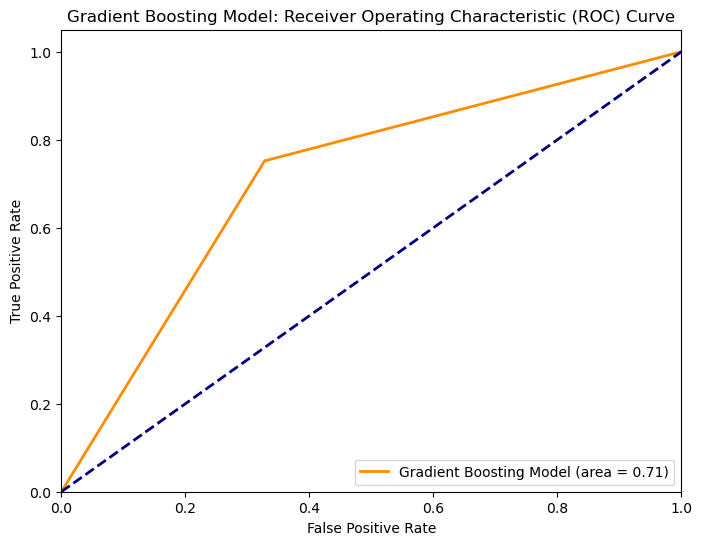

In [75]:
plot_roc_curve(y_test, y_pred_gb, "Gradient Boosting")

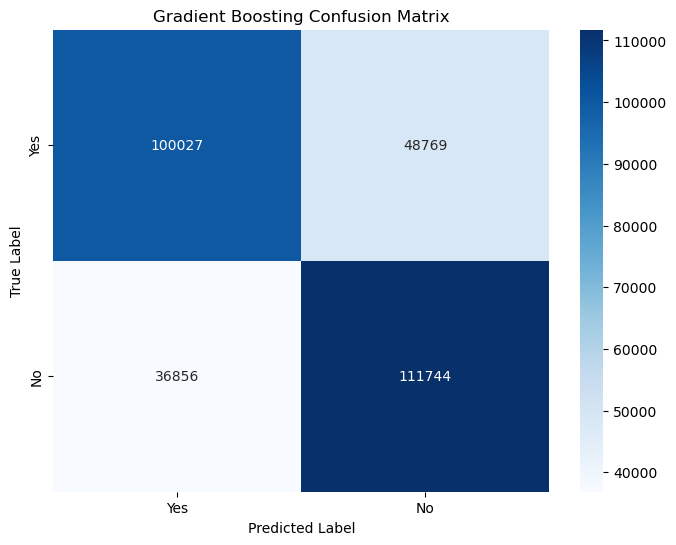

In [76]:
plot_confusion_matrix(y_test, y_pred_gb, ["Yes", "No"],"Gradient Boosting")

In [77]:
model_comparison = pd.DataFrame(report_drk)
model_comparison_transposed = model_comparison.transpose()

model_comparison_transposed

,Accuracy,Precision,Recall,F1_Score,ROC
KNN,0.669101,0.666609,0.675707,0.671127,0.669105
LR,0.719384,0.718072,0.721783,0.719923,0.719386
DT,0.635570,0.635321,0.635363,0.635342,0.635570
RF,0.720733,0.716712,0.729401,0.723001,0.720738
GB,0.712084,0.696168,0.751978,0.722998,0.712110


### Comparing the Models

In [78]:
acc=[]
pre=[]
re=[]
f1=[]
roc=[]
for k,v in report_drk.items():
    for ke,va in v.items():
        if ke=="Accuracy":
            acc.append(va)
        elif ke=="Precision":
            pre.append(va)
        elif ke=="Recall":
            re.append(va)
        elif ke=="F1_Score":
            f1.append(va)
        else:
            roc.append(va)
index=['KNN','LR','DT','RF','GB']

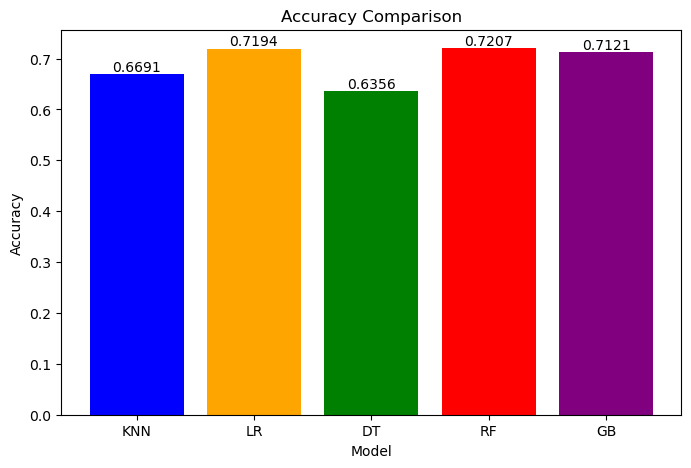

In [79]:
#Plotting the accuracy
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(model_comparison_transposed.index, model_comparison_transposed['Accuracy'], color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


In [80]:
selected_model_drk = str(model_comparison_transposed[model_comparison_transposed['Accuracy'] == max(model_comparison_transposed['Accuracy'])].index.item()).lower()
selected_model_drk

'rf'

In [109]:
joblib.dump(rf, 'model_drk.pkl')

['model_drk.pkl']

## Modelling for Smoking

In [81]:
df_smk = df.copy()

In [82]:
X, y = df_smk.drop(columns=['sight_left', 'sight_right', 'DBP', 'BLDS', 'tot_chole', 'LDL_chole',
                                  'triglyceride', 'urine_protein', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
                                  'SMK_stat_type_cd', 'DRK_YN'], axis = 1), df_smk.SMK_stat_type_cd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.70)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(693924, 11) (297396, 11) (693924,) (297396,)


In [83]:
# Helper Function
report_smk={}
def performance_metirc(y_true_,y_pred_,model_name,y_prob):

  auc_roc = roc_auc_score(y_true_, y_prob, multi_class='ovr')
  accuracy = accuracy_score(y_true_, y_pred_)
  precision = precision_score(y_true_, y_pred_, average='weighted', zero_division=1)  # Specify 'weighted' averaging
  recall = recall_score(y_true_, y_pred_, average='weighted')  # Specify 'weighted' averaging
  f1 = f1_score(y_true_, y_pred_, average='weighted')

  t={model_name:{"Accuracy":0,"Precision":0,"Recall":0,"F1_Score":0,"ROC":0}}
  report_smk.update(t)
  #Storing Report for Tracking
  report_smk[model_name]['Accuracy']=accuracy
  report_smk[model_name]['Precision']=precision
  report_smk[model_name]['Recall']=recall
  report_smk[model_name]['F1_Score']=f1
  report_smk[model_name]['ROC']=auc_roc
  print("Metrics")
  print(f"ROC AUC: {np.round(auc_roc*100,2)}")
  print(f"Accuracy: {np.round(accuracy*100,2)}")
  print(f"Precision: {np.round(precision*100,2)}")
  print(f"Recall: {np.round(recall*100,2)}")
  print(f"F1 Score: {np.round(f1*100,2)}")

In [84]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [85]:
mean_smk = scaler.mean_
std_smk = scaler.scale_

In [110]:
joblib.dump(mean_smk, 'mean_smk.pkl')
joblib.dump(std_smk, 'std_smk.pkl')

['std_smk.pkl']

### KNN Model

In [86]:
knn_smk=KNeighborsClassifier(n_neighbors=3)
knn_smk.fit(X_train,y_train)
y_pred_knn_smk=knn_smk.predict(X_test)

In [87]:
y_prob_knn_smk = knn_smk.predict_proba(X_test)

In [88]:
performance_metirc(y_test,y_pred_knn_smk,"KNN",y_prob_knn_smk)

Metrics
ROC AUC: 73.91
Accuracy: 64.1
Precision: 61.26
Recall: 64.1
F1 Score: 62.27


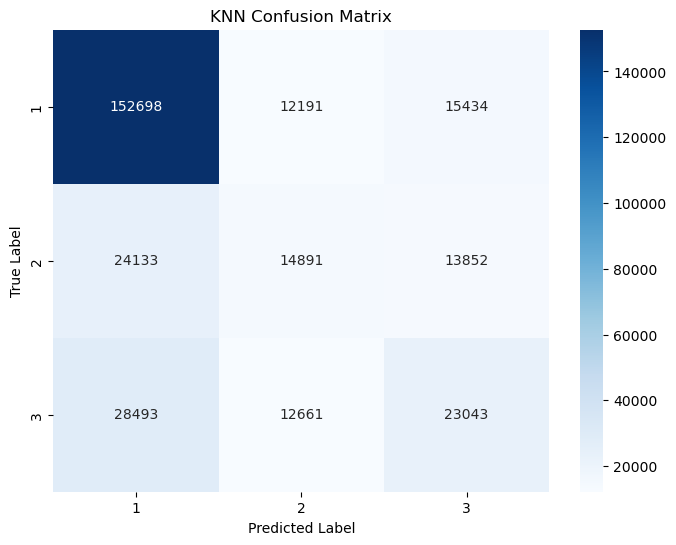

In [89]:
plot_confusion_matrix(y_test, y_pred_knn_smk, ["1", "2", "3"], "KNN")

### Logistic Regression

In [90]:
lr_smk=LogisticRegression(max_iter=100, C=0.01, n_jobs=-1)
lr_smk.fit(X_train,y_train)
y_pred_lr_smk=lr_smk.predict(X_test)

In [91]:
y_prob_lr_smk = lr_smk.predict_proba(X_test)

In [92]:
performance_metirc(y_test,y_pred_lr_smk,"LR",y_prob_lr_smk)

Metrics
ROC AUC: 81.83
Accuracy: 67.03
Precision: 70.23
Recall: 67.03
F1 Score: 67.96


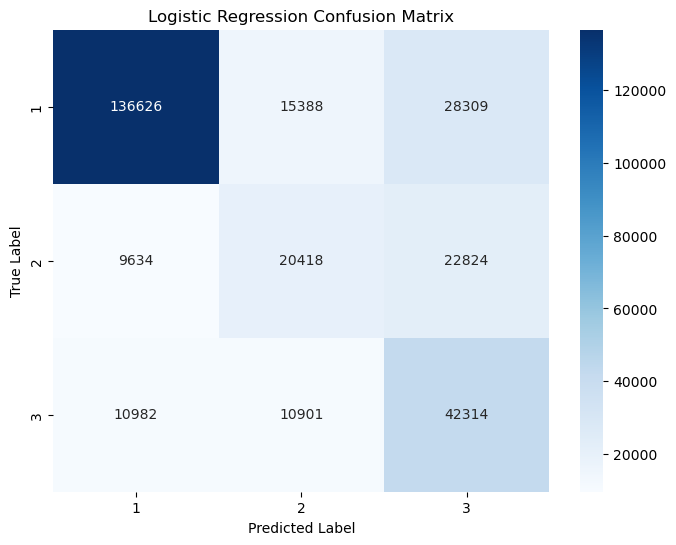

In [93]:
plot_confusion_matrix(y_test, y_pred_lr_smk, ["1", "2","3"],"Logistic Regression")

### Decision Tree

In [94]:
dt_smk=DecisionTreeClassifier()
dt_smk.fit(X_train,y_train)
dt_smk_pred=dt_smk.predict(X_test)

In [95]:
y_prob_dt_smk = dt_smk.predict_proba(X_test)
performance_metirc(y_test,dt_smk_pred,"DT",y_prob_dt_smk)

Metrics
ROC AUC: 63.68
Accuracy: 60.63
Precision: 60.97
Recall: 60.63
F1 Score: 60.8


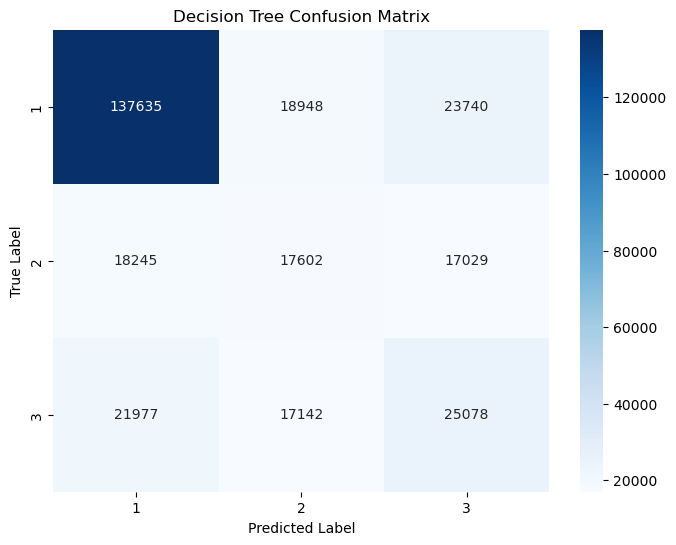

In [96]:
plot_confusion_matrix(y_test, dt_smk_pred, ["1", "2","3"],"Decision Tree")

### Random Forest

In [97]:
rf_smk=RandomForestClassifier(random_state=0,n_jobs=-1)
rf_smk.fit(X_train,y_train)
y_pred_rf_smk=rf_smk.predict(X_test)

In [98]:
y_prob_rf_smk = rf_smk.predict_proba(X_test)
performance_metirc(y_test,y_pred_rf_smk,"RF",y_prob_rf_smk)

Metrics
ROC AUC: 82.04
Accuracy: 66.87
Precision: 67.0
Recall: 66.87
F1 Score: 66.89


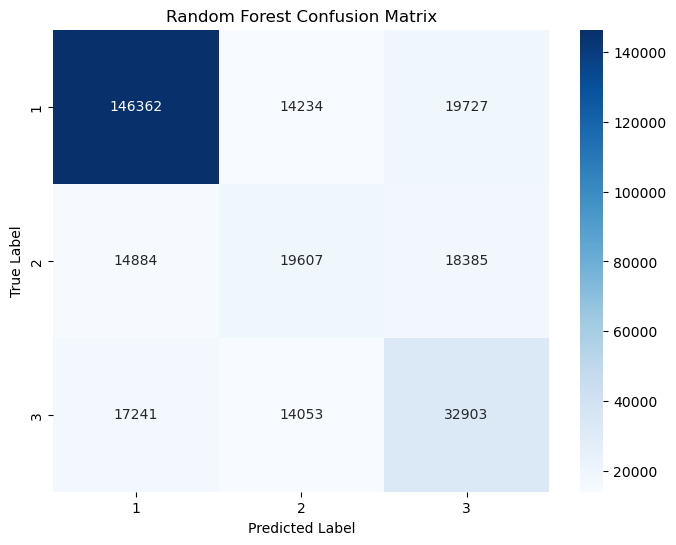

In [99]:
plot_confusion_matrix(y_test, y_pred_rf_smk, ["1", "2","3"],"Random Forest")

### Gradient Boosting

In [100]:
gb_smk=GradientBoostingClassifier(n_estimators=10)
gb_smk.fit(X_train,y_train)
y_pred_gb_smk=gb_smk.predict(X_test)

In [101]:
y_prob_gb_smk = gb_smk.predict_proba(X_test)
performance_metirc(y_test,y_pred_gb_smk,"GB",y_prob_gb_smk)

Metrics
ROC AUC: 82.8
Accuracy: 63.46
Precision: 68.03
Recall: 63.46
F1 Score: 54.01


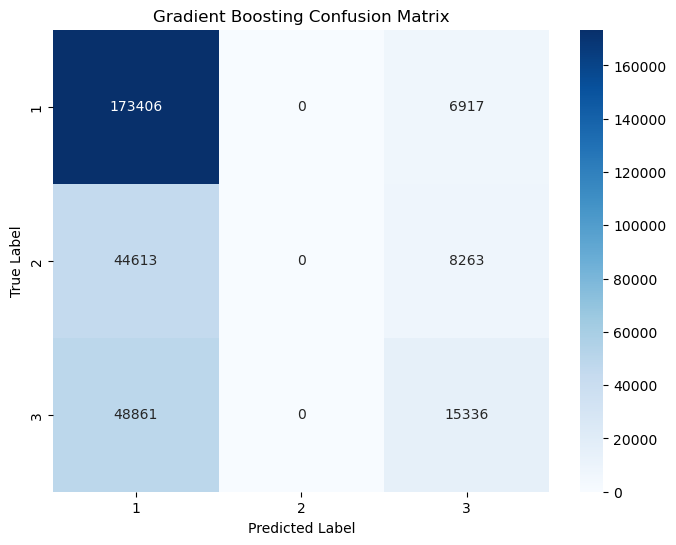

In [102]:
plot_confusion_matrix(y_test, y_pred_gb_smk, ["1", "2","3"],"Gradient Boosting")

In [103]:
acc=[]
pre=[]
re=[]
f1=[]
roc=[]
for k,v in report_smk.items():
    for ke,va in v.items():
        if ke=="Accuracy":
            acc.append(va)
        elif ke=="Precision":
            pre.append(va)
        elif ke=="Recall":
            re.append(va)
        elif ke=="F1_Score":
            f1.append(va)
        else:
            roc.append(va)
index=['KNN','LR','DT','RF','GB',"LGBM"]

In [104]:
report_smk

{'KNN': {'Accuracy': 0.6410039139732882,
  'Precision': 0.6126030403148507,
  'Recall': 0.6410039139732882,
  'F1_Score': 0.6227089927818448,
  'ROC': 0.7390504590233945},
 'LR': {'Accuracy': 0.6703452635543181,
  'Precision': 0.7023122629101252,
  'Recall': 0.6703452635543181,
  'F1_Score': 0.6796107706666911,
  'ROC': 0.8182767151389904},
 'DT': {'Accuracy': 0.6063127950611306,
  'Precision': 0.6097170128492978,
  'Recall': 0.6063127950611306,
  'F1_Score': 0.6079759659744278,
  'ROC': 0.6368184138737235},
 'RF': {'Accuracy': 0.6687110788309191,
  'Precision': 0.6700095062092545,
  'Recall': 0.6687110788309191,
  'F1_Score': 0.6689100074068453,
  'ROC': 0.8203686783203201},
 'GB': {'Accuracy': 0.6346487511600694,
  'Precision': 0.680251064531521,
  'Recall': 0.6346487511600694,
  'F1_Score': 0.5401302918123277,
  'ROC': 0.8279550364859266}}

In [105]:
model_comparison_smk = pd.DataFrame(report_smk)
model_comparison_transposed_smk = model_comparison_smk.transpose()

model_comparison_transposed_smk

,Accuracy,Precision,Recall,F1_Score,ROC
KNN,0.641004,0.612603,0.641004,0.622709,0.739050
LR,0.670345,0.702312,0.670345,0.679611,0.818277
DT,0.606313,0.609717,0.606313,0.607976,0.636818
RF,0.668711,0.670010,0.668711,0.668910,0.820369
GB,0.634649,0.680251,0.634649,0.540130,0.827955


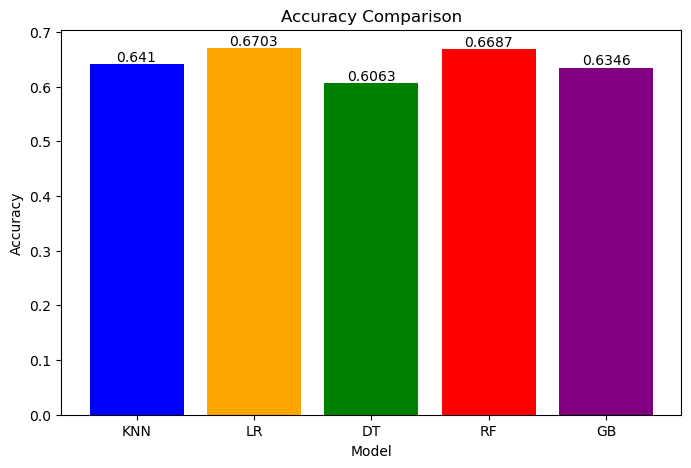

In [106]:
#Plotting the accuracy
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize=(8, 5))
bars = plt.bar(model_comparison_transposed_smk.index, model_comparison_transposed_smk['Accuracy'], color=colors)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


In [107]:
selected_model_smk = str(model_comparison_transposed_smk[model_comparison_transposed_smk['Accuracy'] == max(model_comparison_transposed_smk['Accuracy'])].index.item()).lower()
selected_model_smk

'lr'

In [108]:
joblib.dump(lr_smk, 'model_smk.pkl')

['model_smk.pkl']